<a href="https://colab.research.google.com/github/HoussemDs/satellite_segmentation/blob/main/app_satellite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y numpy scikit-learn opencv-python patchify


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: opencv-python 4.11.0.86
Uninstalling opencv-python-4.11.0.86:
  Successfully uninstalled opencv-python-4.11.0.86


In [ ]:
!pip install scikit-learn

!pip install numpy==1.26.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 46.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires opencv-python>=3.4.8.29, which is not installed.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 86.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's depend

In [ ]:
!pip install opencv-python patchify


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 7.2 MB/s eta 0:00:00


In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from patchify import patchify
from matplotlib import pyplot as plt
import random

In [ ]:
minmaxscaler = MinMaxScaler()


In [ ]:
!ls -lah '/content/drive/MyDrive/data/Semantic segmentation dataset'

total 33K
-rw------- 1 root root  548 Apr  2 11:13  classes.json
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 1'
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 2'
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 3'
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 4'
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 5'
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 6'
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 7'
drwx------ 4 root root 4.0K Apr  2 16:38 'Tile 8'


In [ ]:
dataset_root_folder = '/content/drive/MyDrive/data'

In [ ]:
dataset_name = 'Semantic segmentation dataset'

In [ ]:
for path , subdirs, files in os.walk(os.path.join(dataset_root_folder,dataset_name)):
    dir_name = path.split(os.path.sep)[-1]
    #print(dir_name)
    if dir_name =='masks': #images ken bech n5dem 3la el data
        images = os.listdir(path)
        print(images)
        for i , image_name in enumerate(images):
            if (image_name.endswith('.png')): # twali jpg
                #print(image_name)
                a=True

['image_part_008.png', 'image_part_003.png', 'image_part_001.png', 'image_part_004.png', 'image_part_005.png', 'image_part_007.png', 'image_part_009.png', 'image_part_006.png', 'image_part_002.png']
['image_part_002.png', 'image_part_004.png', 'image_part_001.png', 'image_part_008 (1).png', 'image_part_009 (1).png', 'image_part_008.png', 'image_part_006 (1).png', 'image_part_005 (1).png', 'image_part_009.png', 'image_part_007 (1).png', 'image_part_003.png', 'image_part_007.png', 'image_part_006.png', 'image_part_005.png']
['image_part_004.png', 'image_part_001.png', 'image_part_002.png', 'image_part_006.png', 'image_part_003.png', 'image_part_007.png', 'image_part_005.png', 'image_part_009.png', 'image_part_008.png']
['image_part_006.png', 'image_part_007.png', 'image_part_009.png', 'image_part_002.png', 'image_part_003.png', 'image_part_008.png', 'image_part_005.png', 'image_part_001.png', 'image_part_004.png']
['image_part_009.png', 'image_part_006.png', 'image_part_003.png', 'image_

behi we have the dataset here and everything okay

In [ ]:
image_patch_size = 256

In [ ]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg')

In [ ]:
image.shape

(544, 509, 3)

In [ ]:
print(type(image))

<class 'numpy.ndarray'>


In [ ]:
image_patches = patchify(image,(image_patch_size, image_patch_size, 3), step= image_patch_size)
len(image_patches)

2

In [ ]:
image_x = image_patches[0,0,:,:]
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [ ]:
print('x', image_x.shape)
print('y', image_y.shape)

x (1, 256, 256, 3)
y (1, 256, 256, 3)


In [ ]:
type(Image.fromarray(image))

PIL.Image.Image

In [ ]:
image.shape

(544, 509, 3)

In [ ]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [ ]:

image_dataset = []
mask_dataset = []

for image_type in ['images', 'masks']:
    if image_type == 'images':
        image_extension = 'jpg'
    else:
        image_extension = 'png'

    for tile_id in range(1, 8):
        for image_id in range(1, 20):
            # Load image or mask
            image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}')
            if image is not None:
                # If it's a mask, convert it to RGB (if required)
                if image_type == 'masks':
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Calculate the size of the patches
                size_x = (image.shape[0] // image_patch_size) * image_patch_size
                size_y = (image.shape[1] // image_patch_size) * image_patch_size

                # Crop the image to remove extra borders
                image = Image.fromarray(image)
                image = image.crop((0, 0, size_y, size_x))
                image = np.array(image)

                # Patchify the image into smaller patches
                patchify_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

                # Loop through patches and process them
                for i in range(patchify_images.shape[0]):
                    for j in range(patchify_images.shape[1]):
                        indivdual_patched_array = patchify_images[i, j, :, :]

                        # For image data, normalize each patch
                        if image_type == 'images':

                            indivdual_patched_array = minmaxscaler.fit_transform(indivdual_patched_array.reshape(-1, indivdual_patched_array.shape[-1])).reshape(indivdual_patched_array.shape)
                            indivdual_patched_image = indivdual_patched_array[0]
                            image_dataset.append(indivdual_patched_image)

                        # For mask data, just add the patch without any transformation
                        elif image_type == 'masks':
                            indivdual_patched_mask = indivdual_patched_array[0]
                            mask_dataset.append(indivdual_patched_mask)

In [ ]:
print(indivdual_patched_array.shape)

(1, 256, 256, 3)


In [ ]:
len(image_dataset)
len(mask_dataset)

945

In [ ]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

In [ ]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

198


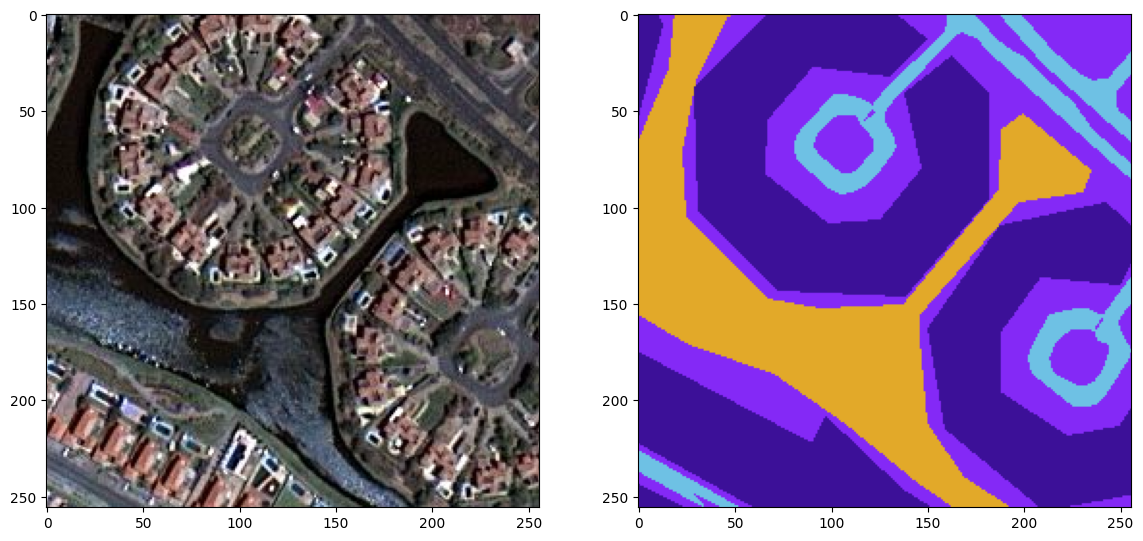

In [ ]:
random_image_id = random.randint(0, len(image_dataset))
print(random_image_id)
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(image_dataset[random_image_id])
plt.subplot(1,2,2)
plt.imshow(mask_dataset[random_image_id])

In [ ]:
class_building = '#3C1098'
class_Land = '#8429F6'
class_Road= '#6EC1E4'
class_Vegetation='#FEDD3A'
class_Water= '#E2A929'
class_Unlabeled ='#9B9B9B'

class_building = class_building.lstrip('#')
class_Land = class_Land.lstrip('#')
class_Road = class_Road.lstrip('#')
class_Vegetation = class_Vegetation.lstrip('#')
class_Water = class_Water.lstrip('#')
class_Unlabeled = class_Unlabeled.lstrip('#')

class_building = np.array(tuple(int(class_building[i:i+2], 16)for i in (0, 2, 4)))
class_Land = np.array(tuple(int(class_Land[i:i+2], 16)for i in (0, 2, 4)))
class_Road = np.array(tuple(int(class_Road[i:i+2], 16)for i in (0, 2, 4)))
class_Vegetation = np.array(tuple(int(class_Vegetation[i:i+2], 16)for i in (0, 2, 4)))
class_Water = np.array(tuple(int(class_Water[i:i+2], 16)for i in (0, 2, 4)))
class_Unlabeled = np.array(tuple(int(class_Unlabeled[i:i+2], 16)for i in (0, 2, 4)))



In [ ]:
class_building,class_Land,class_Road,class_Vegetation,class_Water,class_Unlabeled

(array([ 60,  16, 152]),
 array([132,  41, 246]),
 array([110, 193, 228]),
 array([254, 221,  58]),
 array([226, 169,  41]),
 array([155, 155, 155]))

In [ ]:
mask_dataset.shape[0]

945

array([[[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [254, 221,  58],
        [254, 221,  58],
        [254, 221,  58]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [254, 221,  58],
        [254, 221,  58],
        [254, 221,  58]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [254, 221,  58],
        [254, 221,  58],
        [254, 221,  58]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]], dtype=uint8)
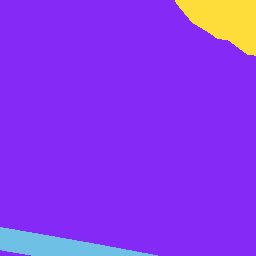

In [ ]:
mask_dataset[-5]

In [ ]:
label = mask_dataset[-1]

In [ ]:
def rgb_to_label(label):
    label_segment = np.zeros(label.shape, dtype=np.uint8)
    label_segment[np.all(label == class_Water, axis=-1)]=0
    label_segment[np.all(label == class_Land, axis=-1)]=1
    label_segment[np.all(label == class_Road, axis=-1)]=2
    label_segment[np.all(label == class_building, axis=-1)]=3
    label_segment[np.all(label == class_Vegetation, axis=-1)]=4
    label_segment[np.all(label == class_Unlabeled, axis=-1)]=5
    label_segment = label_segment[:,:,0]
    return label_segment

In [ ]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_label(mask_dataset[i])
    labels.append(label)


In [ ]:
labels = np.expand_dims(labels,axis=3)
labels.shape

(945, 256, 256, 1)

In [ ]:
print('total unique labels on masks : ',np.unique(labels))

total unique labels on masks :  [0 1 2 3 4 5]


492


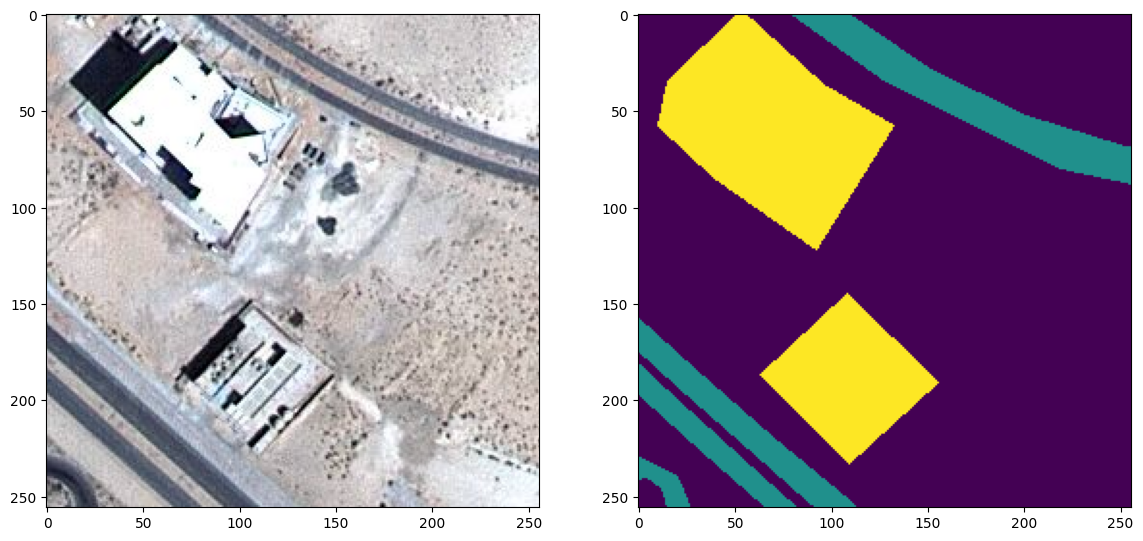

In [ ]:
random_image_id = random.randint(0, len(image_dataset))
print(random_image_id)
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(image_dataset[random_image_id])
plt.subplot(1,2,2)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])


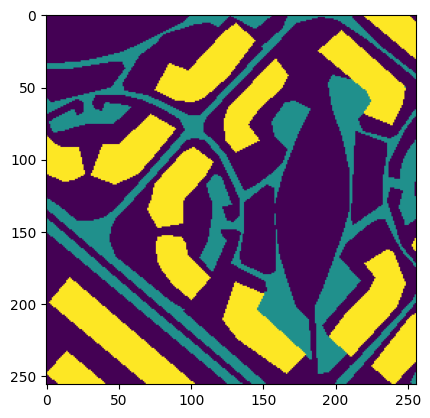

In [ ]:
plt.imshow(labels[55][:,:,0])


In [ ]:
total_classes =  len(np.unique(labels))

In [ ]:
total_classes

6

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
labels_categorical_dataset = to_categorical(labels,num_classes=total_classes)

In [ ]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [ ]:
master_training_dataset = image_dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(master_training_dataset,labels_categorical_dataset,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(756, 256, 256, 3)
(189, 256, 256, 3)
(756, 256, 256, 6)
(189, 256, 256, 6)


In [ ]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)

256
256
3


### To the models now

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [ ]:
from keras import backend as K

In [ ]:
def jaccard_coef(y_true, y_pred):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)
    intersection = K.sum(y_true_flatten * y_pred_flatten)
    final_coef_value = intersection +1.0 / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection +1.0)
    return final_coef_value

In [ ]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):
    inputs = Input((image_height, image_width, image_channels))
    source_input = inputs
    c1 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(source_input)
    c1 = Dropout(.2)(c1)
    c1 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(.2)(c2)
    c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(.2)(c3)
    c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2,2))(c3)

    c4 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(.2)(c4)
    c4 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D((2,2))(c4)

    c5 = Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(.2)(c5)
    c5 = Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(.2)(c6)
    c6 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)


    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(.2)(c7)
    c7 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)

    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(.2)(c8)
    c8 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)

    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(.2)(c9)
    c9 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)

    outputs = Conv2D(n_classes, (1,1), activation='softmax')(c9)

    model = Model(inputs=[source_input], outputs=[outputs])


    return model



In [ ]:
metrics = ['accuracy',jaccard_coef]


In [ ]:
def get_deep_learning_model():
    return multi_unet_model(
        n_classes=total_classes,
        image_height=image_height,
        image_width=image_width,
        image_channels=image_channels
    )


In [95]:
model= get_deep_learning_model()